# Agent-Based Model on Cat Behavior

### In our project we decided to create 4 total cats with several different traits ranging from hunger levels to personality traits
### Based on the traits each cat has will determine their interactions with each other, objects in the room, and people who walk in the room


In [15]:
import random 
#might not need ^^
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

To start here is a legend of all potential personality traits and needs our cats may have.

In [16]:
legend= {'Hunger' : "Will go find food",
         'Sleep': "Needs some sleep",
         'Calm' : 'Very relaxed',
         'Clumsy' : 'Will tumble over and bump into things' ,
         'Shy' : 'Takes a while to warm up, might hide away' ,
         'Affectionate' : 'Loves cuddles' ,
         "Playful" : 'Wants to hunt and play' ,
         'Smart' : 'Learns quickly good at tricks' , 
         'Anxious' : 'Hides and paces around' , 
         'Angry' : 'Will hiss, growl, and bite' ,
         'Curious' : 'Adventurous and Engageful ' ,
         'Scared' : 'Will run away' ,
         'Energetic' : 'Will run around and play'} 



Because we want our interactions to be as random and organic as possible we will create a class that will help cat decisions! 

In [17]:
class Cat:
    def __init__(self,name,personality):
        self.name = name
        self.personality = personality
        self.activity = 'still'

    def action_choices(self):
        '''
        Adding the potential actions for each cat based on the personality.
        has an added range 1 is low 5 is the highest
        '''
        if self.personality.get("Hunger",3) > random.randomint (1,5):
            return 'eat'
        '''
        Anything below 1 kitty will eat if not and above 5 
        the kitty will go to a random other trait and move 
        on until it his still
        '''
        if self.personality.get("Sleep",3) > random.randomint (1,5):
            return 'sleep'
        if self.personality.get("Calm",3) > random.randomint (1,5):
            return 'relax'
        if self.personality.get("Clumsy",3) > random.randomint (1,5):
            return 'bump'

        return 'still'
    def __repr__(self):
        print(f'Cat{self.name}, is {self.peronality}')

In [21]:
cats =[ 
    Cat('Tito',{'Playful': 5, 'Affectionate': 4,' Shy': 5, 'Calm': 2, 'Curious': 3, 'Smart': 1, 'Hunger': 3, "Sleep": 3, "Scared" :4 },),
    Cat('Tito',{'Playful': 5, 'Affectionate': 4,' Shy': 5, 'Calm': 2, 'Curious': 3, 'Smart': 1, 'Hunger': 3, "Sleep": 3, "Scared" :4 },)

]
    
    

    #Add as many personality traits as you like 
        

Here you can find out who our cats are and what their personality traits are!

The start of the simulation for the visualization.

/tmp/ipykernel_3991379/807146460.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cat_dot.set_data(tito.x, tito.y)
/tmp/ipykernel_3991379/807146460.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cat_dot.set_data(tito.x, tito.y)


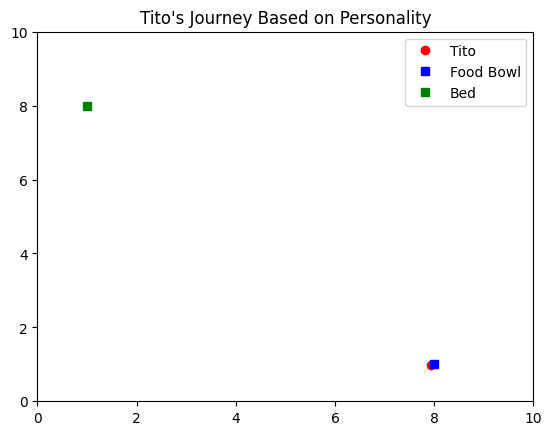

In [8]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Cat Tito with traits
class Cat:
    def __init__(self, name, personality):
        self.name = name
        self.personality = personality
        self.x, self.y = 0, 0  # Start at door (top-left corner)
        self.speed = 0.5
        self.target = self.decide_target()

    def decide_target(self):
        if self.personality.get('Hunger', 0) > 3:
            return (8, 1)  # Go to food bowl
        elif self.personality.get('Sleep', 0) > 3:
            return (1, 8)  # Go to bed
        else:
            return (np.random.randint(1, 9), np.random.randint(1, 9))  # Wander

    def move(self):
        dx, dy = self.target[0] - self.x, self.target[1] - self.y
        dist = (dx**2 + dy**2)**0.5
        if dist > 0.1:
            self.x += self.speed * dx / dist
            self.y += self.speed * dy / dist

# Create Tito the cat
tito = Cat("Tito", {
    'Playful': 5, 'Affectionate': 4, 'Shy': 5, 'Calm': 2,
    'Curious': 3, 'Smart': 1, 'Hunger': 4, 'Sleep': 3
})

# Set up figure
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Tito's Journey Based on Personality")
cat_dot, = ax.plot([], [], 'ro', label='Tito')
food_dot, = ax.plot(8, 1, 'bs', label='Food Bowl')
bed_dot, = ax.plot(1, 8, 'gs', label='Bed')
ax.legend()

# Update function for animation
def update(frame):
    tito.move()
    cat_dot.set_data(tito.x, tito.y)
    return cat_dot,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

# Display animation in notebook using JavaScript
HTML(ani.to_jshtml())
